In [1]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="password",
    database="olist"
)

In [3]:
plt.style.use("seaborn-v0_8-pastel")

### Q4. 카테고리별 월별 매출 추이

SQL문

In [4]:
q4_sql = """
    SELECT
    	DATE_FORMAT(orders.order_purchase_timestamp, '%Y-%m') AS month,
    	SUM(order_payments.payment_value) AS monthly_sales
    FROM
    	order_payments
    INNER JOIN
    	orders
    ON
    	order_payments.order_id = orders.order_id
    INNER JOIN
    	order_items
    ON
    	orders.order_id = order_items.order_id
    INNER JOIN
    	products
    ON
    	order_items.product_id = products.product_id
    INNER JOIN
    	category_name_translation
    ON
        products.product_category_name = category_name_translation.product_category_name
    WHERE
    	category_name_translation.product_category_name_english = 'bed_bath_table'
    GROUP BY
    	month
    ORDER BY
    	month;
"""

데이터 분석

In [5]:
q4_df = pd.read_sql(q4_sql, conn)
q4_df = q4_df.set_index("month")

C:\Users\minni\AppData\Local\Temp\ipykernel_119096\1191515212.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q4_df = pd.read_sql(q4_sql, conn)


In [6]:
q4_df

,monthly_sales
month,
2016-10,2291.710011
2017-01,6054.910007
2017-02,26219.520026
2017-03,41668.269940
2017-04,36794.550107
2017-05,46809.659974
2017-06,50329.079934
2017-07,101051.679904
2017-08,84927.649950


데이터 시각화

C:\Users\minni\AppData\Local\Temp\ipykernel_119096\2038666123.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


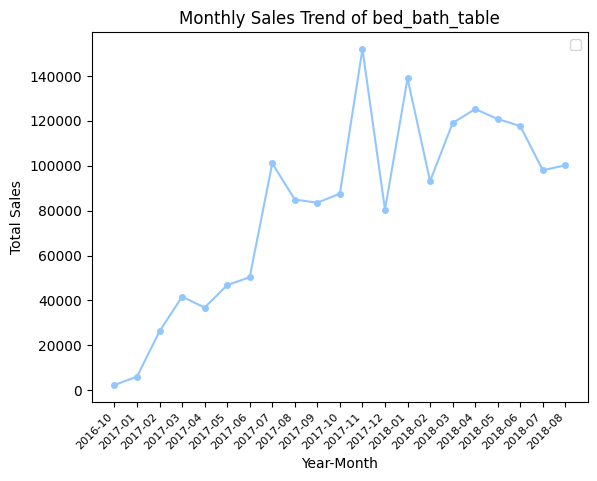

In [7]:
plt.title("Monthly Sales Trend of bed_bath_table")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.plot(q4_df, marker="o", markersize=4)
plt.xticks(size=8, rotation=45, ha="right")
plt.legend()